In [5]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Field map does not contain item "R"
Field map does not contain item "R"


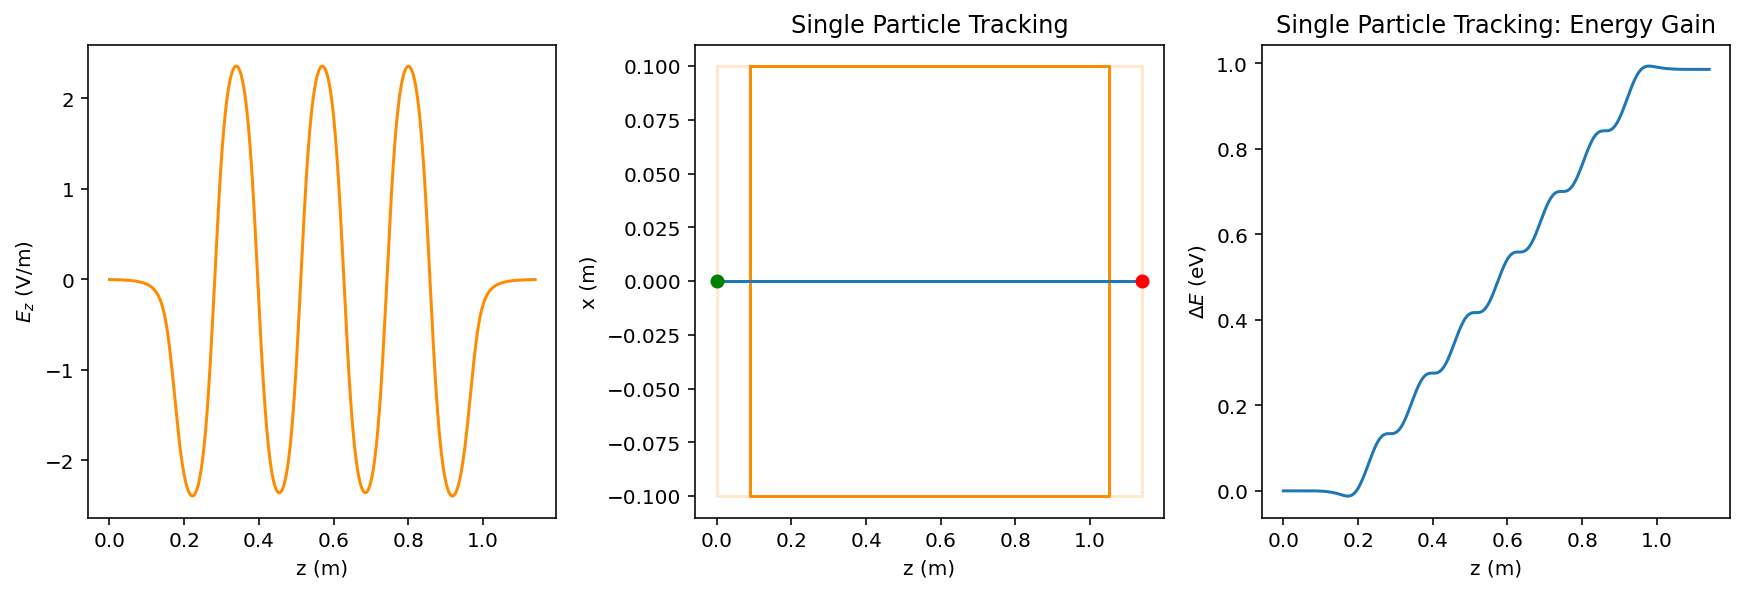

In [129]:
from gpt.maps import Map25D_TM
cnames={'z':'z', 'r':'r', 'Ez':'Ez', 'Er':'Er', 'Bphi':'Bphi'}

cav = Map25D_TM('cav_7_cell', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=1)

G = cav.track_on_axis(t=0, p=10e6, n_screen=200, GBacc=12)

fig, ax = plt.subplots(1, 3, sharex='col', constrained_layout=True, figsize=(12,4))

cav.plot_field_profile(ax=ax[0])
cav.plot_floor(ax=ax[1])

ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'));
ax[1].plot(G.stat('mean_z','screen')[0], G.stat('mean_x', 'screen')[0], 'og');
ax[1].plot(G.stat('mean_z','screen')[-1], G.stat('mean_x', 'screen')[-1], 'or');
ax[1].set_title('Single Particle Tracking')

ax[2].plot(G.stat('mean_z','screen'), G.stat('mean_energy', 'screen')-G.screen[0]['mean_energy']);
ax[2].set_xlabel('z (m)');
ax[2].set_ylabel('$\Delta E$ (eV)');
ax[2].set_title('Single Particle Tracking: Energy Gain');

CPU times: user 198 ms, sys: 299 ms, total: 497 ms
Wall time: 1.49 s


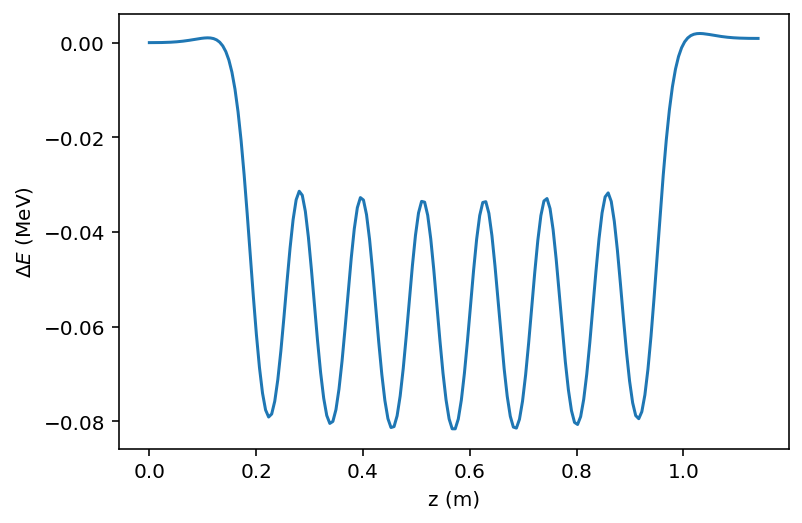

In [115]:
p=10e6
cav._scale=1e6
cav._relative_phase=-90

%time G=cav.autophase(t=0, p=p, n_screen=200)

plt.plot(G.stat('mean_z','screen'), (G.stat('mean_energy', 'screen')-G.screen[0]['mean_energy'])/1e6);
plt.xlabel('z (m)');
plt.ylabel('$\Delta E$ (MeV)');